Kien Truong
<br>
CPSC 483-02
<br>
Professor Avery
<br>
Due date: 5/21/2021
<br>
$$ Project#7 description $$
<br>
This project will utilize different clustering algorithms to segment customers based on their purchasing data.

In [1]:
'''
Question 1 - Load the dataset
'''
import pandas as pd
data = pd.read_csv('spending.csv')
data

,apples,bananas,beer,bread,broccoli,diapers,eggs,milk,potatoes,steak
0,0,0,0,0,13,0,16,8,0,17
1,11,12,7,9,0,26,7,6,5,2
2,14,13,6,12,0,30,8,6,4,2
3,0,0,17,1,0,0,0,0,3,22
4,0,0,45,1,0,0,0,0,5,27
...,...,...,...,...,...,...,...,...,...,...
283,8,10,0,0,16,0,0,0,8,0
284,0,0,0,0,14,0,12,7,0,16
285,0,0,23,0,0,0,0,0,4,17
286,3,14,0,0,20,0,0,0,8,0


In [2]:
'''
Question 2 - Cluster the dataset using the default parameters
'''
from sklearn.cluster import KMeans

kmeans = KMeans().fit(data)
kmeans.labels_

array([5, 7, 1, 4, 2, 6, 5, 3, 2, 1, 6, 0, 3, 2, 4, 0, 0, 5, 6, 3, 6, 3,
       1, 7, 3, 6, 7, 3, 2, 6, 5, 5, 3, 0, 3, 0, 2, 1, 0, 3, 6, 0, 6, 4,
       6, 3, 0, 1, 3, 5, 0, 3, 3, 4, 3, 3, 3, 7, 2, 5, 0, 5, 5, 5, 5, 0,
       3, 0, 5, 6, 2, 0, 0, 5, 3, 3, 2, 7, 0, 0, 6, 2, 4, 1, 1, 0, 5, 2,
       4, 2, 4, 1, 1, 7, 3, 0, 0, 0, 0, 0, 5, 3, 1, 6, 3, 1, 7, 0, 6, 6,
       0, 0, 0, 5, 0, 2, 6, 5, 3, 5, 3, 4, 3, 3, 2, 6, 4, 1, 5, 1, 5, 3,
       1, 7, 6, 0, 0, 5, 4, 5, 5, 3, 5, 6, 3, 3, 3, 0, 5, 7, 3, 3, 3, 5,
       3, 0, 6, 1, 2, 1, 1, 0, 7, 0, 3, 5, 5, 3, 0, 5, 7, 3, 2, 3, 3, 0,
       1, 2, 6, 0, 0, 3, 3, 3, 1, 1, 6, 4, 4, 1, 7, 0, 4, 4, 7, 7, 0, 0,
       1, 3, 6, 2, 5, 6, 6, 3, 3, 6, 3, 2, 6, 6, 6, 5, 5, 7, 1, 5, 3, 6,
       0, 5, 5, 0, 5, 6, 3, 0, 2, 5, 2, 5, 1, 1, 7, 1, 5, 0, 6, 6, 3, 1,
       6, 2, 1, 1, 1, 3, 5, 3, 3, 3, 1, 0, 5, 3, 5, 4, 0, 5, 3, 6, 7, 2,
       2, 0, 0, 1, 0, 6, 3, 2, 0, 5, 1, 5, 1, 3, 1, 3, 5, 3, 0, 3, 5, 4,
       3, 0])

There are 8 clusters in the dataset

In [3]:
'''
Question 3 - Use groupby() to group the data by cluster assignment, then use the GroupBy object to examine 
             descriptive statistics: max, min, and avg.
             Describe any differences you see between the clusters.
'''
group = data.groupby(kmeans.labels_)
maximum = group.max()
minimum = group.min()
avg = group.mean()
print("Max:\n", maximum, '\n')
print("Min:\n", minimum, '\n')
print("Average:\n", avg)

Max:
    apples  bananas  beer  bread  broccoli  diapers  eggs  milk  potatoes  \
0       0        0     0      0        18        0    20    12         0   
1      16       16    12     20         0       44    12    12        10   
2       0        0    50      8         0        0     0     0         8   
3      14       17     0      0        22        0     0     0        15   
4       0        0    23      5         0        0     0     0         8   
5       0        0     0      0        16        0    18     9         0   
6       0        0    34      6         0        0     0     0         8   
7      18       13    12     16         0       28    15    12         8   

   steak  
0     33  
1      6  
2     44  
3      0  
4     36  
5     20  
6     45  
7      6   

Min:
    apples  bananas  beer  bread  broccoli  diapers  eggs  milk  potatoes  \
0       0        0     0      0         3        0    10     0         0   
1       7        5     4      5         0       28

Each cluster is a subset of the original attributes. Customers that belong to one cluster will have similar purchasing habits. For instance, customers belong to cluster 0 would like to purchase beer, bread, potatoes, and steak; they would not purchase apples, bananas, broccoli, diapers, and milk. 

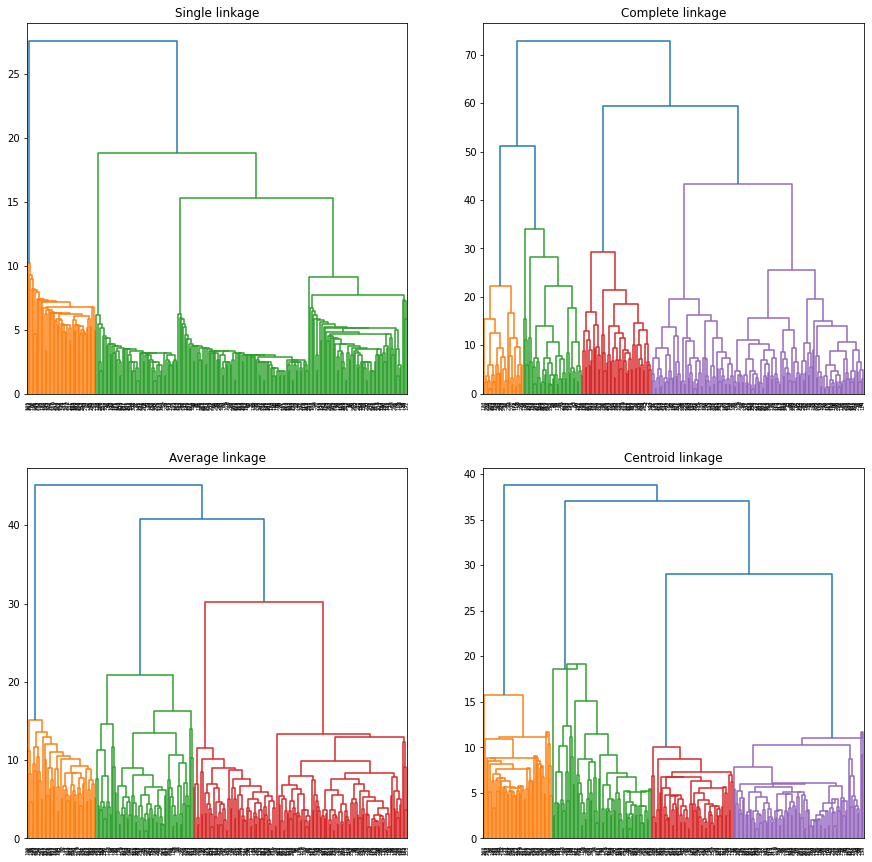

In [4]:
'''
Question 4 - Plot four dendrograms using complete, single, average, and centroid linkage.
             Based on the plots, how many clusters appear to be present in the dataset?
'''
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
'''
----- Single linkage -----
'''
Z_single = hierarchy.linkage(data, 'single')
#Generating 4 subplots for 4 linkages
fig, axes = plt.subplots(2, 2, figsize=(15,15))
axes[0,0].set_title("Single linkage")
axes[0,1].set_title("Complete linkage")
axes[1,1].set_title("Centroid linkage")
axes[1,0].set_title("Average linkage")

dn1 = hierarchy.dendrogram(Z_single, ax=axes[0,0])
'''
----- Complete linkage -----
'''
Z_complete = hierarchy.linkage(data, 'complete')
dn2 = hierarchy.dendrogram(Z_complete, ax=axes[0,1])

'''
----- Average linkage -----
'''
Z_avg = hierarchy.linkage(data, 'average')
dn3 = hierarchy.dendrogram(Z_avg, ax=axes[1,0])

'''
----- Centroid linkage -----
'''
Z_centroid = hierarchy.linkage(data, 'centroid')
dn4 = hierarchy.dendrogram(Z_centroid, ax=axes[1,1])

There are approximately 4-5 clusters appear to be present in the dataset.

In [5]:
'''
Question 5 - Repeat experiment (2) using the number of clusters you determined to be present in experiment (4).
'''
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4).fit(data)
kmeans.labels_

array([0, 1, 1, 2, 2, 2, 0, 3, 2, 1, 2, 0, 3, 2, 2, 0, 0, 0, 2, 3, 2, 3,
       1, 1, 3, 2, 1, 3, 2, 2, 0, 0, 3, 0, 3, 0, 2, 1, 0, 3, 2, 0, 2, 0,
       2, 3, 0, 1, 3, 0, 0, 3, 3, 2, 3, 3, 3, 1, 2, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 2, 2, 0, 0, 0, 3, 3, 2, 1, 0, 0, 2, 2, 2, 1, 1, 0, 0, 2,
       0, 2, 2, 1, 1, 1, 3, 0, 0, 0, 0, 0, 0, 3, 1, 2, 3, 1, 1, 0, 2, 2,
       0, 0, 0, 0, 0, 2, 2, 0, 3, 0, 3, 2, 3, 3, 2, 2, 2, 1, 0, 1, 0, 3,
       1, 1, 2, 0, 0, 0, 2, 0, 0, 3, 0, 2, 3, 3, 3, 0, 0, 1, 3, 3, 3, 0,
       3, 0, 2, 1, 2, 1, 1, 0, 1, 0, 3, 0, 0, 3, 0, 0, 1, 3, 2, 3, 3, 0,
       1, 2, 2, 0, 0, 3, 3, 3, 1, 1, 2, 2, 2, 1, 1, 0, 2, 2, 1, 1, 0, 0,
       1, 3, 2, 2, 0, 2, 2, 3, 3, 2, 3, 2, 2, 2, 2, 0, 0, 1, 1, 0, 3, 2,
       0, 0, 0, 0, 0, 2, 3, 0, 2, 0, 2, 0, 1, 1, 1, 1, 0, 0, 2, 2, 3, 1,
       2, 2, 1, 1, 1, 3, 0, 3, 3, 3, 1, 0, 0, 3, 0, 2, 0, 0, 3, 2, 1, 2,
       2, 0, 0, 1, 0, 2, 3, 2, 0, 0, 1, 0, 1, 3, 1, 3, 0, 3, 0, 3, 0, 2,
       3, 0])

In [6]:
'''
Question 6 - Use AgglomerativeClustering() and repeat for the same number of clusters.
'''
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=4).fit(data)
clustering.labels_

array([1, 2, 2, 0, 0, 0, 1, 3, 0, 2, 0, 1, 3, 0, 0, 1, 1, 1, 0, 3, 0, 3,
       2, 2, 3, 0, 2, 3, 0, 0, 1, 1, 3, 1, 3, 1, 0, 2, 1, 3, 0, 1, 0, 0,
       0, 3, 1, 2, 3, 1, 1, 3, 3, 0, 3, 3, 3, 2, 0, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 0, 0, 1, 1, 1, 3, 3, 0, 2, 1, 1, 0, 0, 0, 2, 2, 1, 1, 0,
       0, 0, 0, 2, 2, 2, 3, 1, 1, 1, 1, 1, 1, 3, 2, 0, 3, 2, 2, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 3, 1, 3, 0, 3, 3, 0, 0, 0, 2, 1, 2, 1, 3,
       2, 2, 0, 1, 1, 1, 0, 1, 1, 3, 1, 0, 3, 3, 3, 1, 1, 2, 3, 3, 3, 1,
       3, 1, 0, 2, 0, 2, 2, 1, 2, 1, 3, 1, 1, 3, 1, 1, 2, 3, 0, 3, 3, 1,
       2, 0, 0, 1, 1, 3, 3, 3, 2, 2, 0, 0, 0, 2, 2, 1, 0, 0, 2, 2, 1, 1,
       2, 3, 0, 0, 1, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 1, 1, 2, 2, 1, 3, 0,
       1, 1, 1, 1, 1, 0, 3, 1, 0, 1, 0, 1, 2, 2, 2, 2, 1, 1, 0, 0, 3, 2,
       0, 0, 2, 2, 2, 3, 1, 3, 3, 3, 2, 1, 1, 3, 1, 0, 1, 1, 3, 0, 2, 0,
       0, 1, 1, 2, 1, 0, 3, 0, 1, 1, 2, 1, 2, 3, 2, 3, 1, 3, 1, 3, 1, 0,
       3, 1], dtype=int64)

For different algorithms, the label assignments are different. However, it seems like both algorithms classify points to be in the same cluster that they belong to in the previous experiement. For instance, comparing the first 8 observations in the agglomerative clustering algorithm ([1,2,2,0,0,0,1,3]) to the K-means clustering algorithm obtained in experiment 5 ([0,1,1,2,2,2,0,3]), there's a pattern in the label assignments. Class 1, 2, 0, and 3 in K-means are the same as class 0, 1, 2, and 3 in agglomerative clustering respectively. 

In [7]:
'''
Question 7 - Repeat experiment (3) with the clusters you obtained in experiment (5). 
             How would you describe the various types of customers? 
             What can you determine about them based on the data?
'''
group = data.groupby(kmeans.labels_)
maximum = group.max()
minimum = group.min()
avg = group.mean()
print("Max:\n", maximum, '\n')
print("Min:\n", minimum, '\n')
print("Average:\n", avg)

Max:
    apples  bananas  beer  bread  broccoli  diapers  eggs  milk  potatoes  \
0       0        0     6      3        18        0    20    12         5   
1      18       16    12     20         0       44    15    12        10   
2       0        0    50      8         0        0     0     0         8   
3      14       17     0      0        22        0     0     0        15   

   steak  
0     33  
1      6  
2     45  
3      0   

Min:
    apples  bananas  beer  bread  broccoli  diapers  eggs  milk  potatoes  \
0       0        0     0      0         0        0     0     0         0   
1       6        5     4      5         0       17     0     4         1   
2       0        0     6      0         0        0     0     0         0   
3       1        0     0      0         8        0     0     0         5   

   steak  
0      8  
1      0  
2     17  
3      0   

Average:
       apples   bananas       beer      bread   broccoli    diapers       eggs  \
0   0.000000  0.00000

Various types of customers can be described by the number of clusters obtained above. Customer preferences can be classified by choosing the non-zero values based on the min, max, and mean.

In [8]:
'''
Question 8 - For each customer segment identified, suggest some other items they would and would not be 
             likely to purchase in future shopping trips.
'''

'\nQuestion 8 - For each customer segment identified, suggest some other items they would and would not be \n             likely to purchase in future shopping trips.\n'

Group 1: The customer would buy steak, broccoli, eggs, beer, bread, milk, potatoes; they would not be likely to purchase apples, bananas, diapers. This group targets customers that don't like fruits and diapers.
<br>
Group 2: The customer would buy apples, bananas, beer, bread, diapers, eggs, milk, potatoes, and steak; they would not be likely to purchase broccoli. This group targets families that have kids.
<br>
Group 3: The customer would buy beer, bread, potatoes, and steak; they would not be likely to purchase apples, bananas, broccoli, eggs, and milk. This group targets customers that are on high carb diets and may be for alcoholics as well?
<br>
Group 4: The customer would buy apples, bananas, broccoli, and potatoes; they would not be likely to purchase beer, bread, diapers, eggs, milk, and steak. This group targets vegetarians.